In [130]:
from GP import *
from GP_utils import *
import matplotlib.pyplot as plt
from pyDOE import lhs
import numpy as np

In [131]:
def f_H(x):
    return (6.0*x-2.0)**2 * np.sin(12.*x-4.0)

def f_L(x):
    return 0.5*f_H(x) + 10.0*(x-0.5) - 5.0

def Normalize(X, X_m, X_s):
    return (X-X_m)/(X_s)

In [132]:
np.random.seed(1234)
N_H = 3
N_L = 50
D = 1
lb = 0.0
ub = 1.0
noise_L = 0
noise_H = 0

Normalize_input_data = 1
Normalize_output_data = 1

# Training data    
X_L = np.linspace(0,1,N_L)[:,np.newaxis]
y_L = f_L(X_L) + noise_L*np.random.randn(N_L,D)

X_H = np.linspace(0,1,N_H)[:,np.newaxis]
y_H = f_H(X_H) + noise_H*np.random.randn(N_H,D)

# Test data
nn = 200
X_star = np.linspace(lb, ub, nn)
y_star = f_H(X_star)

 #  Normalize Input Data
if Normalize_input_data == 1:
    X = np.vstack((X_L,X_H))
    X_m = np.mean(X, axis = 0)
    X_s = np.std(X, axis = 0)   
    X_L = Normalize(X_L, X_m, X_s)
    X_H = Normalize(X_H, X_m, X_s)
    lb = Normalize(lb, X_m, X_s)
    ub = Normalize(ub, X_m, X_s)
    X_star = Normalize(X_star, X_m, X_s)

#  Normalize Output Data
if Normalize_output_data == 1:
    y = np.vstack((y_L,y_H))
    y_m = np.mean(y, axis = 0)
    y_s = np.std(y, axis = 0)   
    y_L = Normalize(y_L, y_m, y_s)
    y_H = Normalize(y_H, y_m, y_s)
    y_star = Normalize(y_star, y_m, y_s)
    
hyp = np.log(np.ones((D+1,)))
hyp = np.concatenate([hyp,hyp])
rho = np.array([1])
logsigma_n = np.array([-4.0,-4.0])
hyp = np.concatenate([hyp,logsigma_n,rho])

In [133]:
model = multifidelity_GP(X_L,y_L,X_H,y_H,hyp)
model.train()
mu,cov = model.predict(X_star[:,np.newaxis])

Log likelihood -69.92526069586728
Log likelihood -85.80307320717566
Log likelihood -91.80344612079817
Log likelihood -156.0260608504709
Log likelihood -310.22178835718995
Log likelihood -321.90225773386805
Log likelihood -333.2289928852722
Log likelihood -333.75577952807646
Log likelihood -335.3491990540063
Log likelihood -339.6768274543088
Log likelihood -340.2089288884865
Log likelihood -340.826466415005
Log likelihood -341.053425584183
Log likelihood -341.23511423929557
Log likelihood -341.26145586517015
Log likelihood -341.2644673347347
Log likelihood -341.26660709168306
Log likelihood -341.27659325837453
Log likelihood -341.29037895393805
Log likelihood -341.3075730785876
Log likelihood -341.3177714313559
Log likelihood -341.31845726634424
Log likelihood -341.31898655973663
Log likelihood -341.32020644500636
Log likelihood -341.3209582583961
Log likelihood -341.3213678275467
Log likelihood -341.32182561425583
Log likelihood -341.32185059073475
Log likelihood -341.32224584227475
Lo

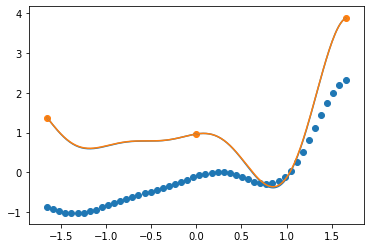

In [134]:
plt.scatter(X_L,y_L)
plt.scatter(X_H,y_H)
plt.plot(X_star,y_star)
plt.plot(X_star,mu)

In [13]:
yf = np.random.multivariate_normal(mu.flatten(),cov,100)

# Draw prior samples

(-4, 4)

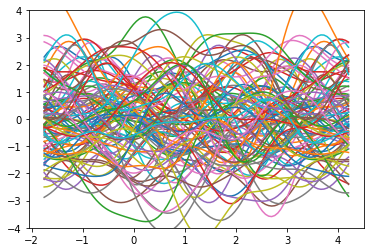

In [164]:
num_prior = 100
# guessed hyperparameters
hyp0 = np.log(np.ones((d+1,)))
sigma_n = np.array([-1])
hyp = np.concatenate([hyp0,sigma_n])

sigma_f_sin = np.array([np.log(2)])
hyp_sin0 = np.log(np.ones((d,)))
period = np.array([np.log(5)])
hyp_sin = np.concatenate([sigma_f_sin,hyp_sin0,period,sigma_n])

# number of test points for prior
test_num = 100
xtest = np.linspace(-0.5,2,test_num)[:,np.newaxis]
xtest = (xtest-xmean)/xstd

# find prior covariance
cov = periodic_kernel(xtest,xtest,hyp_sin[:-1])
ytest = np.random.multivariate_normal(np.zeros((len(xtest),)),cov,size=num_prior)
for i in range(ytest.shape[0]):
    plt.plot(xtest,ytest[i])
plt.ylim(-4,4)

In [168]:
hyp_final = GP_model.train(hyp_sin)

Log likelihood -1.389770296624392
Log likelihood -1.7194806258242483
Log likelihood -1.8164501903629304
Log likelihood -2.546266063881691
Log likelihood -2.97294335118242
Log likelihood -3.9695916654087107
Log likelihood -4.317597305668414
Log likelihood -4.888421238081497
Log likelihood -5.155571930381433
Log likelihood -5.166120600727596
Log likelihood -5.203449120958347
Log likelihood -5.323963522946535
Log likelihood -5.4380614638407465
Log likelihood -5.501000654654193
Log likelihood -5.525125855021243
Log likelihood -5.529602743046897
Log likelihood -5.532374856636508
Log likelihood -5.535578579034684
Log likelihood -5.53941325842063
Log likelihood -5.540733344485302
Log likelihood -5.541011947271366
Log likelihood -5.541032779384439
Log likelihood -5.541036595968204
Log likelihood -5.541037479045457
Log likelihood -5.541038474095784
Log likelihood -5.541038641749969
Log likelihood -5.541038643175833


In [169]:
hyp_final

array([-0.65843147, -0.29200486,  0.09478148, -0.8539523 ])

In [170]:
mu,cov = GP_model.predict(xp[:,np.newaxis])
post = np.random.multivariate_normal(mu[:,0],cov,size=10)

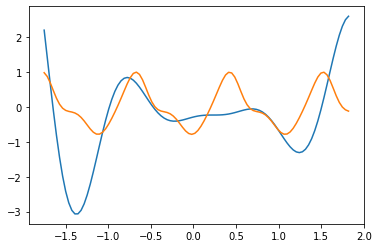

In [171]:
plt.plot(xp,yp)
plt.plot(xp,mu)

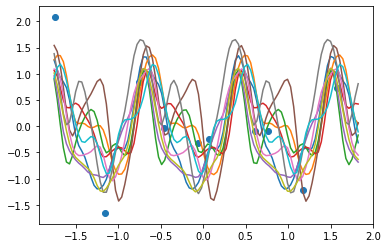

In [172]:
plt.scatter(x,y)
for i in range(post.shape[0]):
    plt.plot(xp,post[i])